In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.calibration import LabelEncoder

In [9]:
df = pd.read_csv('/content/Crime_Data_from_2020_to_Present.csv')

1. **DR_NO**: A unique identifier for each report (likely a case or incident number).
2. **Date Rptd**: The date the incident was reported (as an object, possibly a string in your DataFrame).
3. **DATE OCC**: The actual date the incident occurred.
4. **TIME OCC**: The time the incident occurred, represented as an integer (likely in a 24-hour format).
5. **AREA**: A numerical code representing the geographical area where the incident took place.
6. **AREA NAME**: The name of the area corresponding to the `AREA` code (e.g., district or zone).
7. **Rpt Dist No**: A district-level reporting code, possibly a sub-area or police precinct number.
8. **Part 1-2**: Likely indicates whether the crime is classified as Part 1 (serious crimes) or Part 2 (less serious crimes) based on a crime categorization standard.
9. **Crm Cd**: A numerical code for the type of crime committed.
10. **Crm Cd Desc**: A textual description of the crime type corresponding to the `Crm Cd`.
11. **Mocodes**: A string of "modus operandi" codes describing the method or behavior in the commission of the crime. This field has missing values.
12. **Vict Age**: Age of the victim involved in the incident.
13. **Vict Sex**: Sex of the victim (`M` for male, `F` for female, or `X` for unknown/missing). Missing values are present.
14. **Vict Descent**: Ethnicity or descent of the victim (e.g., Caucasian, African-American). Missing values are present.
15. **Premis Cd**: A numerical code representing the type of premises where the crime occurred (e.g., residence, business, public space).
16. **Premis Desc**: A description of the premises corresponding to `Premis Cd`.
17. **Weapon Used Cd**: A numerical code for the type of weapon used in the incident, if applicable. This field has many missing values.
18. **Weapon Desc**: A description of the weapon used corresponding to `Weapon Used Cd`.
19. **Status**: A code indicating the status of the case (e.g., active, closed, unfounded).
20. **Status Desc**: A textual description of the `Status` (e.g., "Active," "Closed - No Suspect").
21. **Crm Cd 1**: Primary crime code associated with the incident. Missing values are minimal.
22. **Crm Cd 2**: Secondary crime code (if applicable). Missing values are significant.
23. **Crm Cd 3**: Tertiary crime code (if applicable). Most values are missing.
24. **Crm Cd 4**: Quaternary crime code (if applicable). Most values are missing.
25. **LOCATION**: Textual representation of the location of the incident (e.g., address or landmark).
26. **Cross Street**: Cross-street information, if available. Many values are missing.
27. **LAT**: Latitude of the incident's location (geographical coordinate).
28. **LON**: Longitude of the incident's location (geographical coordinate).


In [10]:
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


In [11]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [12]:
df.shape

(743817, 28)

#EDA()


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743817 entries, 0 to 743816
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           743817 non-null  int64  
 1   Date Rptd       743817 non-null  object 
 2   DATE OCC        743817 non-null  object 
 3   TIME OCC        743817 non-null  int64  
 4   AREA            743817 non-null  int64  
 5   AREA NAME       743817 non-null  object 
 6   Rpt Dist No     743817 non-null  int64  
 7   Part 1-2        743817 non-null  int64  
 8   Crm Cd          743817 non-null  int64  
 9   Crm Cd Desc     743817 non-null  object 
 10  Mocodes         641793 non-null  object 
 11  Vict Age        743817 non-null  int64  
 12  Vict Sex        646777 non-null  object 
 13  Vict Descent    646771 non-null  object 
 14  Premis Cd       743808 non-null  float64
 15  Premis Desc     743393 non-null  object 
 16  Weapon Used Cd  258193 non-null  float64
 17  Weapon Des

In [14]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,7.438170e+05,743817.000000,743817.000000,743817.000000,743817.000000,743817.000000,743817.000000,743808.000000,258193.000000,743808.000000,55086.000000,1839.000000,54.000000,743817.000000,743817.000000
mean,2.145867e+08,1334.877319,10.717617,1118.155374,1.415971,500.929161,29.920445,305.927261,362.581739,500.669532,957.231384,983.693312,989.925926,33.969753,-117.993467
std,1.019061e+07,653.669683,6.092044,609.211199,0.492889,207.982265,21.723517,216.805718,123.675447,207.771223,111.982666,51.595992,29.327591,1.881087,6.523385
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-2.000000,101.000000,101.000000,110.000000,210.000000,434.000000,821.000000,0.000000,-118.667600
25%,2.021079e+08,900.000000,6.000000,622.000000,1.000000,331.000000,11.000000,101.000000,309.000000,331.000000,998.000000,998.000000,998.000000,34.013300,-118.429500
50%,2.118209e+08,1415.000000,11.000000,1142.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.000000,34.058500,-118.321400
75%,2.214132e+08,1900.000000,16.000000,1618.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.000000,34.163000,-118.273900
max,2.399165e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,974.000000,516.000000,956.000000,999.000000,999.000000,999.000000,34.334300,0.000000


In [15]:
# Nan values pct
pct_nan = df.apply(lambda x: x.isna().sum()/len(df))
pct_nan

,0
DR_NO,0.000000
Date Rptd,0.000000
DATE OCC,0.000000
TIME OCC,0.000000
AREA,0.000000
AREA NAME,0.000000
Rpt Dist No,0.000000
Part 1-2,0.000000
Crm Cd,0.000000
Crm Cd Desc,0.000000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743817 entries, 0 to 743816
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           743817 non-null  int64  
 1   Date Rptd       743817 non-null  object 
 2   DATE OCC        743817 non-null  object 
 3   TIME OCC        743817 non-null  int64  
 4   AREA            743817 non-null  int64  
 5   AREA NAME       743817 non-null  object 
 6   Rpt Dist No     743817 non-null  int64  
 7   Part 1-2        743817 non-null  int64  
 8   Crm Cd          743817 non-null  int64  
 9   Crm Cd Desc     743817 non-null  object 
 10  Mocodes         641793 non-null  object 
 11  Vict Age        743817 non-null  int64  
 12  Vict Sex        646777 non-null  object 
 13  Vict Descent    646771 non-null  object 
 14  Premis Cd       743808 non-null  float64
 15  Premis Desc     743393 non-null  object 
 16  Weapon Used Cd  258193 non-null  float64
 17  Weapon Des

In [54]:
# Filter rows where LON > -1.2
filtered_rows = df[df['LON'] > -1.2]

# Display the filtered rows with LON and LAT columns
print(filtered_rows[['LON', 'LAT']])

        LON  LAT
1402    0.0  0.0
2095    0.0  0.0
3143    0.0  0.0
4885    0.0  0.0
5064    0.0  0.0
...     ...  ...
408260  0.0  0.0
408265  0.0  0.0
496525  0.0  0.0
664059  0.0  0.0
669227  0.0  0.0

[2266 rows x 2 columns]


In [55]:
# Drop rows where both LON and LAT are 0.0
df = df[~((df['LON'] == 0.0) & (df['LAT'] == 0.0))]

# Display the shape of the updated DataFrame
print(f"Updated DataFrame shape: {df.shape}")


Updated DataFrame shape: (741551, 28)


In [56]:
categories = df['Crm Cd Desc'].unique()  # Get unique values
print(categories)

['BATTERY - SIMPLE ASSAULT' 'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE'
 'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'
 'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'
 'RAPE, FORCIBLE' 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)'
 'OTHER MISCELLANEOUS CRIME'
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'BURGLARY FROM VEHICLE' 'CRIMINAL THREATS - NO WEAPON DISPLAYED' 'ARSON'
 'INTIMATE PARTNER - SIMPLE ASSAULT' 'THEFT PLAIN - PETTY ($950 & UNDER)'
 'THEFT OF IDENTITY' 'ROBBERY'
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' 'BURGLARY'
 'VEHICLE - STOLEN' 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'
 'BRANDISH WEAPON' 'INTIMATE PARTNER - AGGRAVATED ASSAULT'
 'BUNCO, GRAND THEFT' 'THEFT, PERSON' 'BATTERY WITH SEXUAL CONTACT'
 'BIKE - STOLEN' 'BATTERY POLICE (SIMPLE)'
 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD' 'VIOLATION OF COURT ORDER'
 'TRESPASSING' 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)'
 'VIOLATION OF RESTRAINING ORDER' 'DISTURBING THE PEACE'

In [57]:
categories = df['Crm Cd Desc'].value_counts()  # Get unique values
print(categories)

Crm Cd Desc
VEHICLE - STOLEN                                           79447
BATTERY - SIMPLE ASSAULT                                   58540
THEFT OF IDENTITY                                          48130
BURGLARY FROM VEHICLE                                      45960
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    45566
                                                           ...  
PICKPOCKET, ATTEMPT                                            3
GRAND THEFT / AUTO REPAIR                                      2
FAILURE TO DISPERSE                                            2
DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
INCITING A RIOT                                                1
Name: count, Length: 138, dtype: int64


<ipython-input-58-471dc054337d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=crime_counts.index, y=crime_counts.values, palette='viridis')


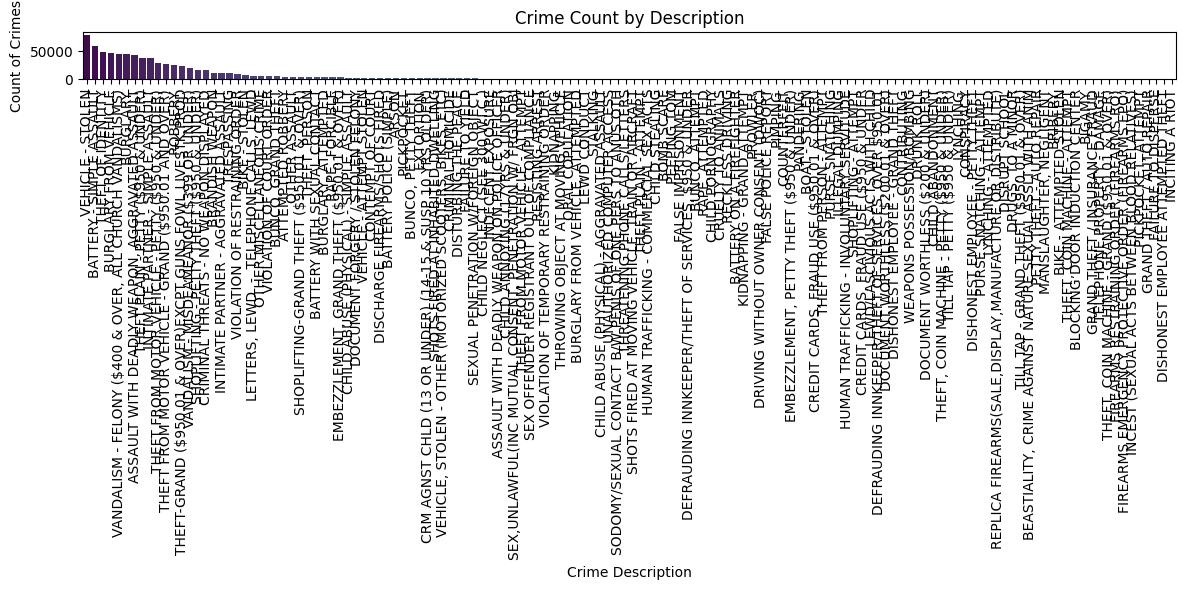

In [58]:
# Assuming df is your DataFrame
plt.figure(figsize=(12, 6))  # Set the figure size

# Count occurrences of each unique crime description
crime_counts = df['Crm Cd Desc'].value_counts()

# Create the bar plot
sns.barplot(x=crime_counts.index, y=crime_counts.values, palette='viridis')

# Set labels and title
plt.xlabel('Crime Description')
plt.ylabel('Count of Crimes')
plt.title('Crime Count by Description')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility

# Show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [59]:
corr1 = df.corr(numeric_only=True)
corr1

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
DR_NO,1.000000,-0.022769,0.047799,0.048103,0.010733,-0.028422,-0.004322,0.051330,0.004280,-0.028362,0.028501,0.033169,0.107347,0.025214,-0.024633
TIME OCC,-0.022769,1.000000,0.001120,0.001175,-0.054645,0.018453,-0.036246,-0.067408,-0.005954,0.018477,0.001934,-0.002475,-0.032534,0.005014,-0.005861
AREA,0.047799,0.001120,1.000000,0.999045,0.009476,0.000282,0.015684,0.003039,-0.019817,0.000061,-0.035837,0.032764,0.156107,0.333938,-0.450440
Rpt Dist No,0.048103,0.001175,0.999045,1.000000,0.009355,0.000180,0.015663,0.002954,-0.019522,-0.000040,-0.036168,0.032020,0.157350,0.331685,-0.451435
Part 1-2,0.010733,-0.054645,0.009476,0.009355,1.000000,0.698231,0.195872,0.270173,0.440064,0.698723,0.075160,-0.009255,0.125987,0.005751,-0.003174
Crm Cd,-0.028422,0.018453,0.000282,0.000180,0.698231,1.000000,-0.012768,0.102621,0.376936,0.999299,0.001748,0.119496,0.040683,-0.000878,0.002807
Vict Age,-0.004322,-0.036246,0.015684,0.015663,0.195872,-0.012768,1.000000,0.192653,0.082412,-0.012655,-0.021661,-0.013876,-0.006533,0.041577,-0.074553
Premis Cd,0.051330,-0.067408,0.003039,0.002954,0.270173,0.102621,0.192653,1.000000,0.209897,0.102543,-0.058076,-0.034221,0.015834,0.031473,-0.056805
Weapon Used Cd,0.004280,-0.005954,-0.019817,-0.019522,0.440064,0.376936,0.082412,0.209897,1.000000,0.377809,-0.153326,-0.079363,0.057703,0.061367,-0.075480
Crm Cd 1,-0.028362,0.018477,0.000061,-0.000040,0.698723,0.999299,-0.012655,0.102543,0.377809,1.000000,0.022937,0.164372,-0.041371,-0.000980,0.002887


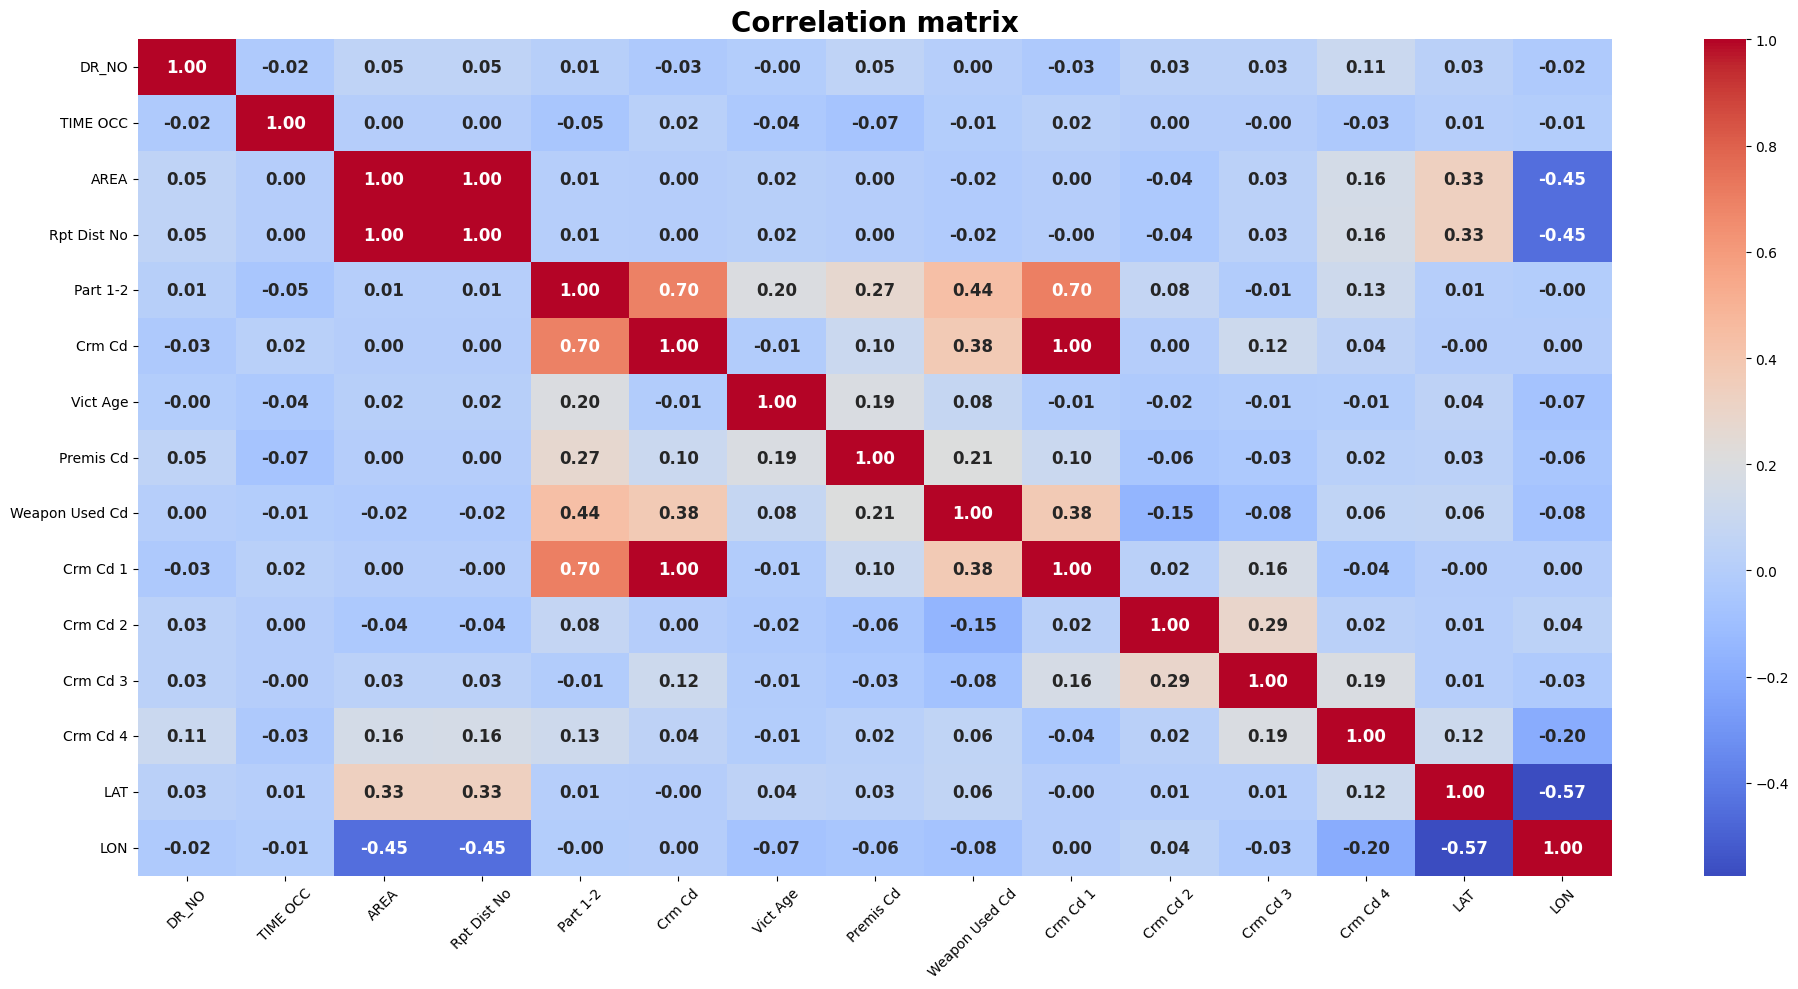

In [60]:
plt.figure(figsize=(20,10))
sns.heatmap(corr1 , annot=True ,fmt=".2f" , cmap='coolwarm' ,cbar=True , square=False,  annot_kws={'size': 12, 'weight': 'bold'})
plt.title('Correlation matrix',fontsize=20,fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Geospatial Visualization (Crime Locations):

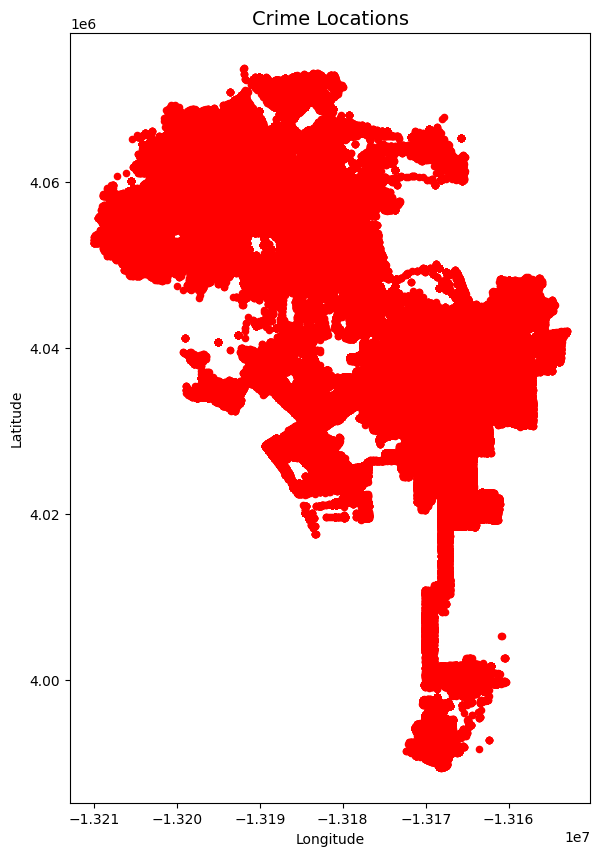

In [61]:

# Create a GeoDataFrame with geometry from LAT and LON
geometry = [Point(xy) for xy in zip(df['LON'], df['LAT'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs='EPSG:4326')  # CRS: WGS84

# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(10, 10))

# Reproject to Web Mercator (EPSG:3857) for basemap compatibility
gdf = gdf.to_crs(epsg=3857)

# Plot the points
gdf.plot(ax=ax, marker='o', color='red', markersize=20)


# Set title and labels
plt.title('Crime Locations', fontsize=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

In [70]:
percentage_distribution_an = df['LOCATION'].value_counts().apply(lambda x: (x / len(df)) * 100)
percentage_distribution_an

,count
LOCATION,
800 N ALAMEDA ST,0.182995
7TH,0.164385
6TH ST,0.163981
7TH ST,0.159665
6TH,0.153597
...,...
700 W MACARTHUR AV,0.000135
4400 S HUNTINGTON DR,0.000135
HORACE,0.000135


In [ ]:
percentage_distribution_an = df["Area_Name"].value_counts().apply(lambda x: (x / len(df)) * 100)
percentage_distribution_an

In [71]:
df['DATE OCC'].value_counts()

,count
DATE OCC,
12/02/2022 12:00:00 AM,1125
01/01/2020 12:00:00 AM,1089
10/01/2022 12:00:00 AM,1038
02/02/2023 12:00:00 AM,1027
06/01/2022 12:00:00 AM,1019
...,...
03/29/2020 12:00:00 AM,420
03/22/2020 12:00:00 AM,417
04/09/2020 12:00:00 AM,414


In [72]:
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')

# Extract hour, day, month, and year
df['Hour'] = df['DATE OCC'].dt.hour
df['Day'] = df['DATE OCC'].dt.day
df['Month'] = df['DATE OCC'].dt.month
df['Year'] = df['DATE OCC'].dt.year

# Calculate percentage distribution for each component
percentage_distribution_day = df['Day'].value_counts(normalize=True) * 100
percentage_distribution_month = df['Month'].value_counts(normalize=True) * 100
percentage_distribution_year = df['Year'].value_counts(normalize=True) * 100

<ipython-input-72-6aaa5d9f55f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p')
<ipython-input-72-6aaa5d9f55f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['DATE OCC'].dt.hour
<ipython-input-72-6aaa5d9f55f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [73]:

print("\nPercentage Distribution - Day:\n", percentage_distribution_day)
print("\nPercentage Distribution - Month:\n", percentage_distribution_month)
print("\nPercentage Distribution - Year:\n", percentage_distribution_year)

Percentage Distribution - Hour:
 Hour
0    100.0
Name: proportion, dtype: float64

Percentage Distribution - Day:
 Day
1     4.669942
2     3.840194
3     3.717883
15    3.381157
5     3.326946
10    3.321012
4     3.285276
8     3.258845
6     3.247248
20    3.231740
12    3.223244
14    3.221896
18    3.219738
7     3.216906
16    3.207601
13    3.203960
17    3.195734
11    3.178743
28    3.178608
23    3.172405
21    3.170112
22    3.157167
9     3.156762
19    3.130061
24    3.121431
26    3.118734
27    3.117115
25    3.107945
30    2.888810
29    2.885439
31    1.847344
Name: proportion, dtype: float64

Percentage Distribution - Month:
 Month
1     9.792988
5     9.732574
3     9.535420
4     9.380474
2     9.209886
6     8.559627
10    7.519914
7     7.457882
8     7.404481
12    7.210158
9     7.143271
11    7.053325
Name: proportion, dtype: float64

Percentage Distribution - Year:
 Year
2022    31.495609
2021    28.002794
2020    26.762421
2023    13.739176
Name: proportion, 

In [75]:
df.to_csv("CleanedDataCrime.csv", index=False)

In [76]:
from google.colab import files
files.download("CleanedDataCrime.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>